# Assignment #2 - Classification

<font color="red"> <b> Due: April 10  EOD</b> </font>

<font color="blue"> Karan Bali </font>

# I. Introduction

I'll be using Banking marketing data set to try out 7 Models (4 ML & 3 NN). After that i'll compare the trained models using some of the common metrics (like Accuracy, Precision, F1 score, ROC and confusion matrix) that are used to compare classification models.

I'll also try to analyze the reasons, whether results were good as expected or bad. 

# II. Data

You may choose one of the following three datasets to work on. Introduce your data and visualize them. Describe your observations about the data. 
1. https://archive.ics.uci.edu/ml/datasets/covertype
2. https://archive.ics.uci.edu/ml/datasets/bank+marketing
3. https://archive.ics.uci.edu/ml/datasets/Activity+recognition+using+wearable+physiological+measurements (data download link - https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6960825/bin/sensors-19-05524-s001.zip)


# III. Method

Summarize the Least Mean Square Classifier, Fisher Linear Discriminant, Perceptron,logistic regression, and Neural Network.
Do not forget explain your implementation. 

The explanation of your codes should not be the comments in a code cell. 
Each implementation will be followed by a separate cell that should include
 - review of the 4 classification models 
 - your implementation and description


### Method

Importing the data set & dependencies

In [319]:
import numpy as np

##your method implementation goes here

# Importing Dependencies
from prml import nn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from prml.preprocess import PolynomialFeature
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, confusion_matrix
from sklearn import preprocessing
import seaborn as sns

from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
    SoftmaxRegression
)

np.random.seed(1234)

# Reading Dataset (i.e. https://archive.ics.uci.edu/ml/datasets/bank+marketing )
data=pd.read_csv("./bank.csv", sep=';')
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


Transforming all the character data features into numerical features

In [320]:
# Converting Character data features into numerical features

data.drop(labels = ['duration'], axis = 1, inplace = True)
data['y']=data['y'].map({'yes':1,'no':0})
data['marital']=data['marital'].map({'married':0,'single':1,'divorced':2})
data['job']=data['job'].map({'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11})
data['education']=data['education'].map({ 'secondary':0,'tertiary':1,'primary':2,'unknown':3})
data['default']=data['default'].map({'no':0,'yes':1,'unknown':2})
data['housing']=data['housing'].map({'no':0,'yes':1,'unknown':2})
data['loan']=data['loan'].map({'no':0,'yes':1,'unknown':2})
data['contact']=data['contact'].map({'cellular':0,'telephone':1,'unknown':2})
data['poutcome']=data['poutcome'].map({'nonexistent':0,'failure':1,'success':2})
data['month']=data['month'].map({ 'jan':0, 'feb':1, 'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
data['poutcome']=data['poutcome'].map({'unknown':0,'failure':1,'success':2,'other':3})
data = pd.get_dummies(data, columns=["poutcome"])
cor_deposit=data.corr()
cor_deposit["y"].sort_values(ascending=False)


y            1.000000
previous     0.116714
pdays        0.104087
marital      0.061242
age          0.045092
job          0.027401
month        0.023335
balance      0.017905
default      0.001303
education    0.001210
day         -0.011244
campaign    -0.061147
loan        -0.070517
housing     -0.104683
contact     -0.133595
Name: y, dtype: float64

Seaborn pairplot of the data features. This gives an idea about the interdependence of features on each other.

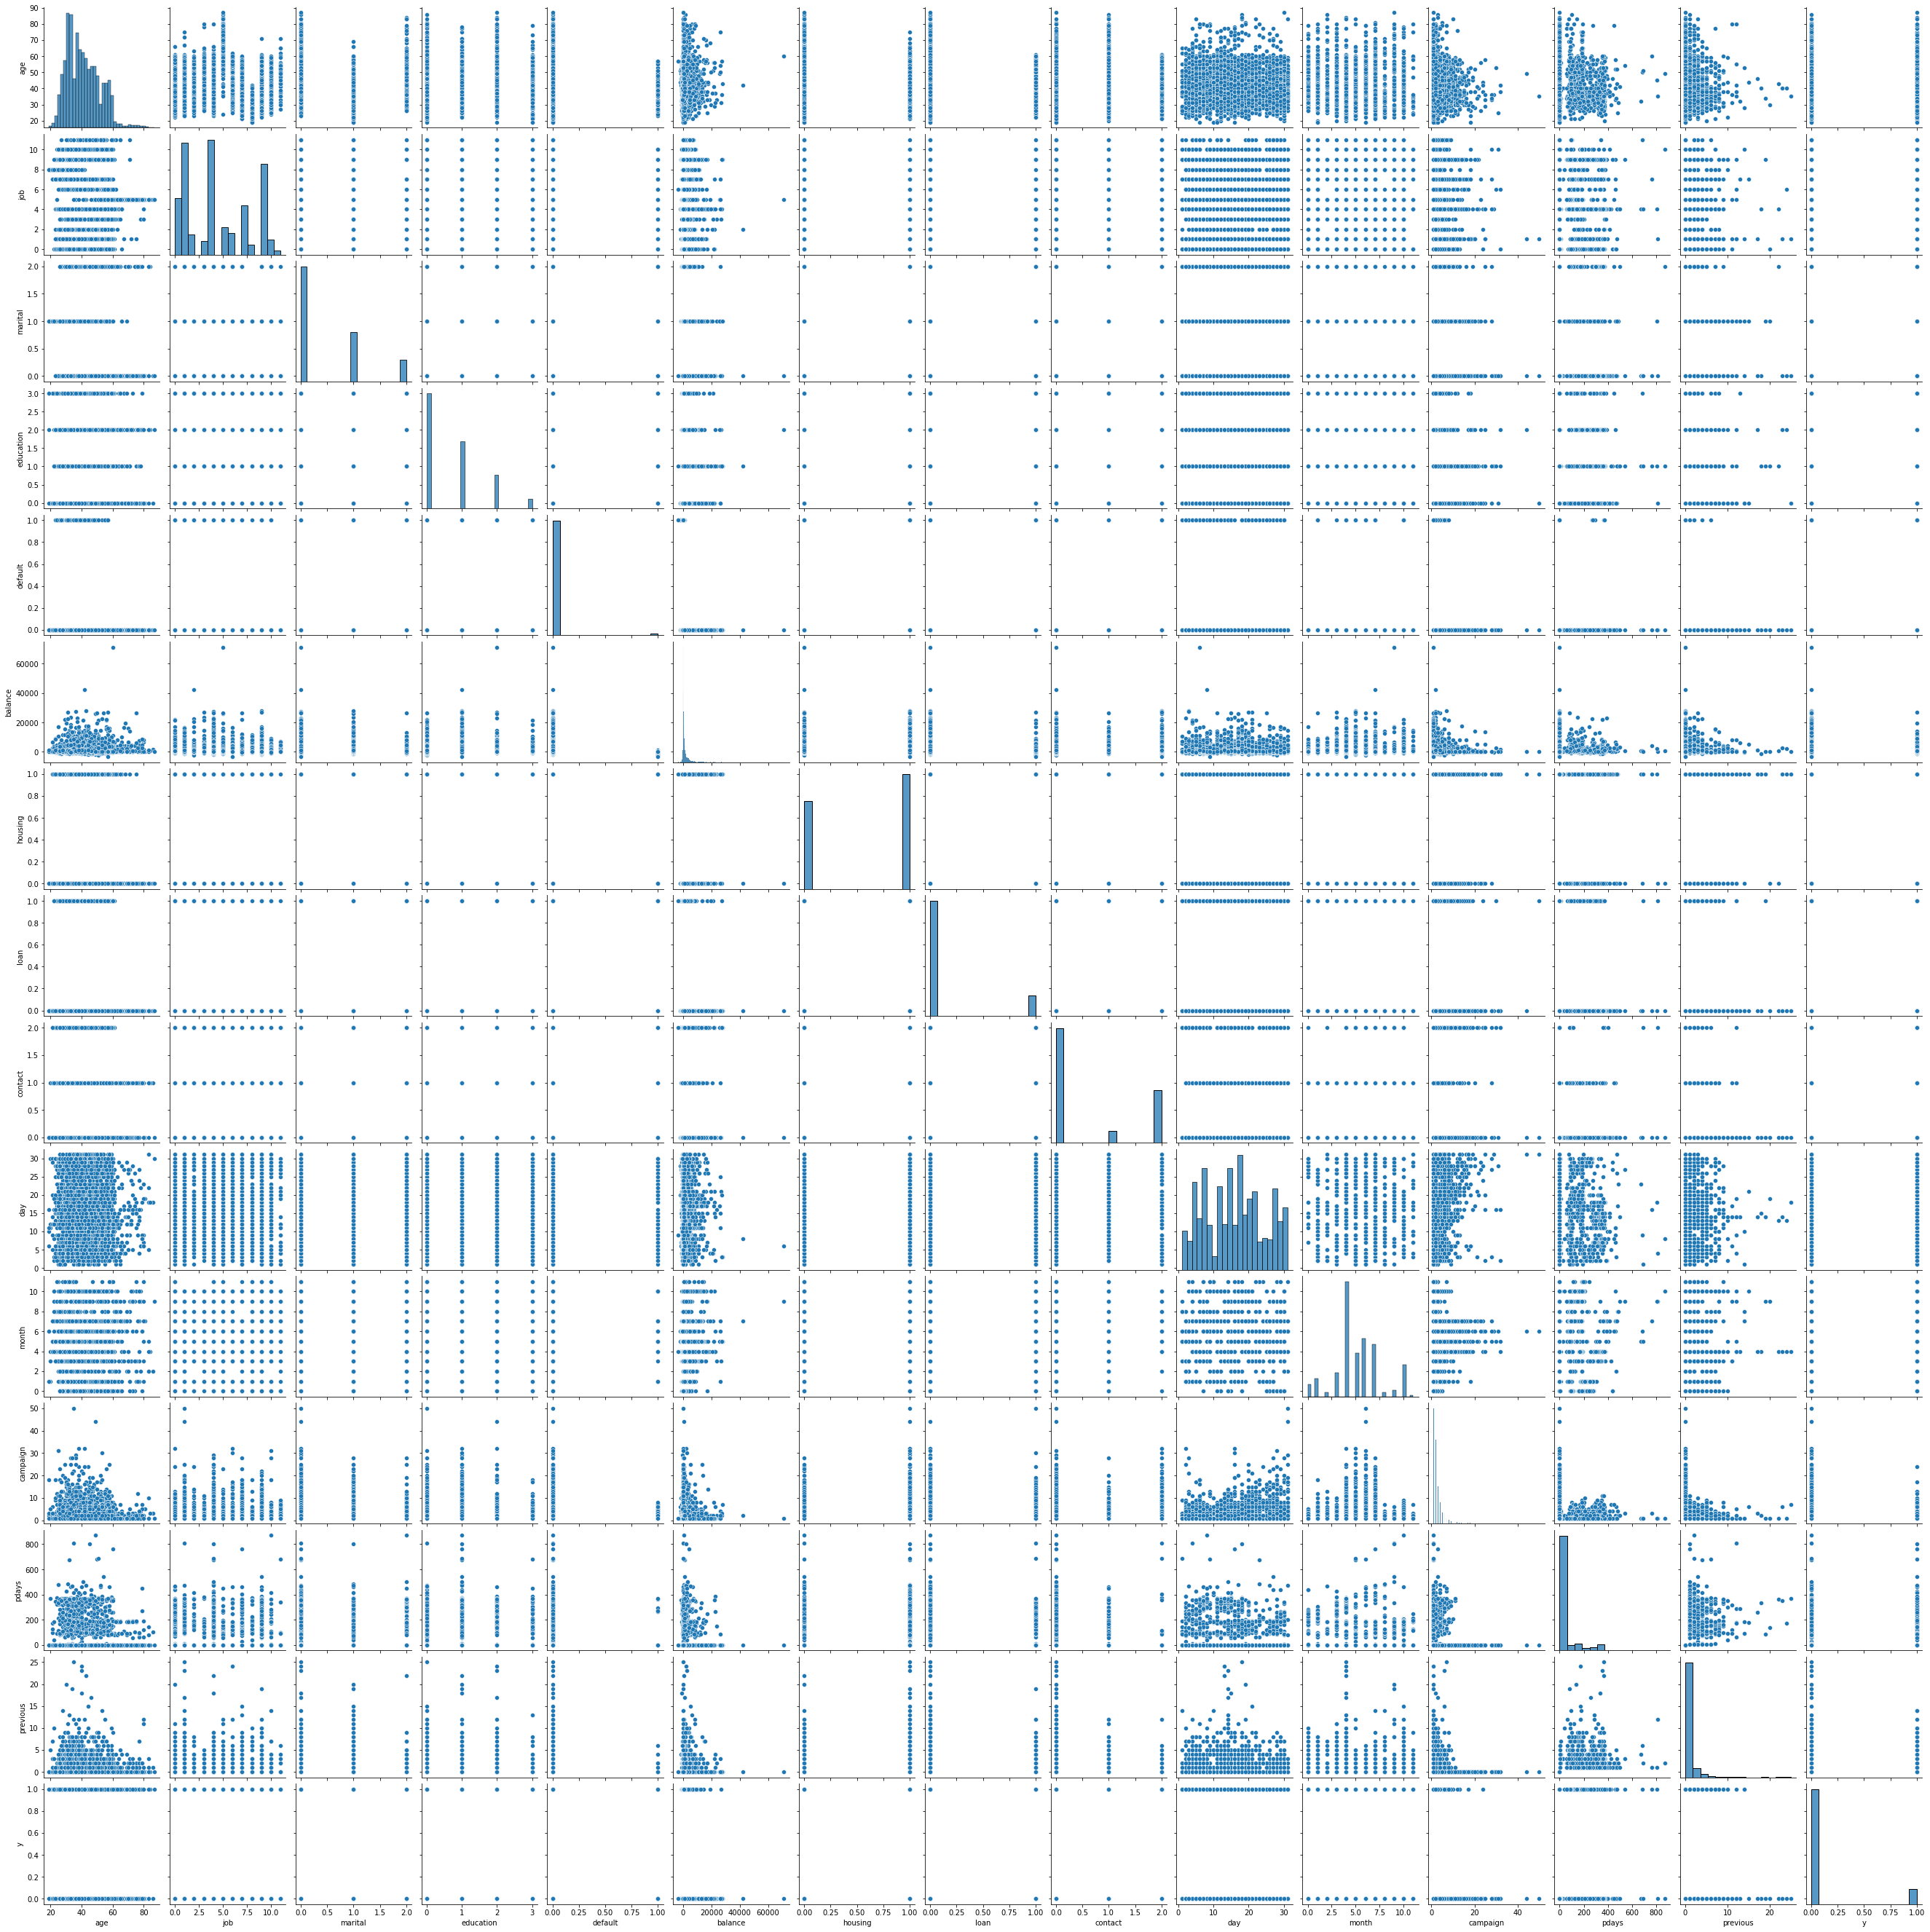

In [321]:
# Seaborn pairplot of the data
sns.pairplot(data)

Seaborn Co-relational heatmap of the data features. This gives an idea about the interdependence of features on each other.

<AxesSubplot:>

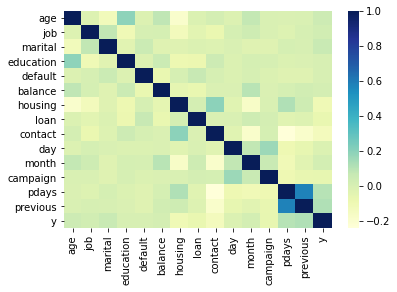

In [322]:
# Seaborn Co-relational heatmap of the data
sns.heatmap(data.corr(method='pearson'), cmap="YlGnBu", annot=False)

<b>One can clearly observe some relation between last three features (i.e pdays, previous & y [target variable])</b>

Splitting data set into Training & Testing set by the ratio of 80:20

In [323]:
x_train=data.drop(labels=['y'],axis=1)
y_train=data['y'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Least Squares Classifier

First I converted the features into a polynomial basis, so that i can perform Least Square interpolation on training data set. Then i used PMRL 'LeastSquaresClassifier()' method to train the model. Finally, i evaluate the model on test set & print out the calculated metrics.

In [324]:
feature = PolynomialFeature(2)
ls_train = feature.transform(X_train)
ls_test = feature.transform(X_test)

model = LeastSquaresClassifier()
model.fit(ls_train, Y_train)
y = model.classify(ls_test)

In [325]:
accuracy = accuracy_score(Y_test, y)
precision = precision_score(Y_test, y)
f1 = f1_score(Y_test, y)
roc = roc_auc_score(Y_test, y)
conf_matrix = confusion_matrix(Y_test, y)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:",f1)
print("ROC:",roc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.901657458563536
Precision: 0.5833333333333334
F1: 0.13592233009708737
ROC: 0.5353902853902854
Confusion Matrix:
[[809   5]
 [ 84   7]]


## Logistic Regression

I used PMRL 'LogisticRegression()' method to train the model. Finally i evaluate the model on test set & print out the calculated metrics.

In [326]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)
y = logistic_regression.classify(X_test)


In [327]:
accuracy = accuracy_score(Y_test, y)
precision = precision_score(Y_test, y)
f1 = f1_score(Y_test, y)
roc = roc_auc_score(Y_test, y)
conf_matrix = confusion_matrix(Y_test, y)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:",f1)
print("ROC:",roc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8994475138121547
Precision: 0.0
F1: 0.0
ROC: 0.5
Confusion Matrix:
[[814   0]
 [ 91   0]]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Fishers Linear Discriminant

I used PMRL 'FishersLinearDiscriminant()' method to train the model. Finally i evaluate the model on test set & print out the calculated metrics. Fisher linear discriminant works differently than Least squares, where it tries to maximize the ratio between between-class variance to within-class variance.

In [332]:
model = FishersLinearDiscriminant()
model.fit(X_train, Y_train)
y = model.classify(X_test)

In [333]:
accuracy = accuracy_score(Y_test, y)
precision = precision_score(Y_test, y)
f1 = f1_score(Y_test, y)
roc = roc_auc_score(Y_test, y)
conf_matrix = confusion_matrix(Y_test, y)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:",f1)
print("ROC:",roc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5580110497237569
Precision: 0.15436241610738255
F1: 0.25650557620817843
ROC: 0.646934146934147
Confusion Matrix:
[[436 378]
 [ 22  69]]


___
___

Reading data again as 'y' should be mapped b/w (-1,1) for next models. Also, Converting Character data features into numerical features

In [347]:
# Reading data again as 'y' should be mapped b/w (-1,1) for next models. Also, Converting Character data features into numerical features

data=pd.read_csv("./bank.csv", sep=';')
data.drop(labels = ['duration'], axis = 1, inplace = True)
data['y']=data['y'].map({'yes':1,'no':-1})
data['marital']=data['marital'].map({'married':0,'single':1,'divorced':2})
data['job']=data['job'].map({'admin.':0,'blue-collar':1,'entrepreneur':2,'housemaid':3,'management':4,'retired':5,'self-employed':6,'services':7,'student':8,'technician':9,'unemployed':10,'unknown':11})
data['education']=data['education'].map({ 'secondary':0,'tertiary':1,'primary':2,'unknown':3})
data['default']=data['default'].map({'no':0,'yes':1,'unknown':2})
data['housing']=data['housing'].map({'no':0,'yes':1,'unknown':2})
data['loan']=data['loan'].map({'no':0,'yes':1,'unknown':2})
data['contact']=data['contact'].map({'cellular':0,'telephone':1,'unknown':2})
data['poutcome']=data['poutcome'].map({'nonexistent':0,'failure':1,'success':2})
data['month']=data['month'].map({ 'jan':0, 'feb':1, 'mar':2,'apr':3,'may':4,'jun':5,'jul':6,'aug':7,'sep':8,'oct':9,'nov':10,'dec':11})
data['poutcome']=data['poutcome'].map({'unknown':0,'failure':1,'success':2,'other':3})
data = pd.get_dummies(data, columns=["poutcome"])
cor_deposit=data.corr()
cor_deposit["y"].sort_values(ascending=False)

x_train=data.drop(labels=['y'],axis=1)
y_train=data['y'].astype(int)
X_train,X_test,Y_train,Y_test = train_test_split(x_train,y_train,test_size=0.2, random_state=2)
X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Perceptron

I used PMRL 'Perceptron()' method to train the model. Finally i evaluate the model on test set & print out the calculated metrics.

In [335]:
model = Perceptron()
model.fit(X_train, Y_train)
y = model.classify(X_test)

In [336]:
accuracy = accuracy_score(Y_test, y)
precision = precision_score(Y_test, y)
f1 = f1_score(Y_test, y)
roc = roc_auc_score(Y_test, y)
conf_matrix = confusion_matrix(Y_test, y)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:",f1)
print("ROC:",roc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.825414364640884
Precision: 0.06493506493506493
F1: 0.05952380952380952
ROC: 0.4832464832464833
Confusion Matrix:
[[742  72]
 [ 86   5]]


## Classification Neural Network

I used PMRL 'ClassificationNetwork()'Class & method to train the model for 60 epochs. Finally i evaluate the model on test set & print out the calculated metrics.

In [348]:
class ClassificationNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return h @ self.w2 + self.b2

In [349]:
model = ClassificationNetwork(14, 100, 1)
optimizer = nn.optimizer.Adam(model.parameter, 1e-4)

history = []
for i in range(100):
    model.clear()
    logit = model(X_train)
    log_likelihood = -nn.loss.sigmoid_cross_entropy(logit, y_train).sum()
    optimizer.maximize(log_likelihood)
    history.append(log_likelihood.value)

y = model(X_test).value
loss = 0
for i,v in enumerate(y):
    if Y_test[i] == -1 and v < 0:
        loss +=1
    elif Y_test[i] == 1 and v >= 0:
        loss +=1

accuracy = ((Y_test.shape[0] - loss)/Y_test.shape[0])*100
y_new =[]
for i,v in enumerate(y):
    
    if v < 0:
        y_new.append(1)
    elif v >= 0:
        y_new.append(-1)
        
precision = precision_score(Y_test, y_new)
f1 = f1_score(Y_test, y_new)
roc = roc_auc_score(Y_test, y_new)
conf_matrix = confusion_matrix(Y_test, y_new)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:",f1)
print("ROC:",roc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 79.66850828729281
Precision: 0.09565217391304348
F1: 0.10679611650485436
ROC: 0.4965574965574966
Confusion Matrix:
[[710 104]
 [ 80  11]]


## Regularized Regression Neural Network

I used PMRL 'RegularizedRegressionNetwork()'Class & method to train the model. Finally i evaluate the model on test set & print out the calculated metrics.

In [342]:
class RegularizedRegressionNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)
        self.prior = nn.Gaussian(0, 1)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return h @ self.w2 + self.b2
    
    def log_prior(self):
        logp = 0
    
        for param in self.parameter.values():
            logp += np.sum(self.prior.log_pdf(param).value)
        return logp

In [343]:
model = RegularizedRegressionNetwork(14, 40, 1)
optimizer = nn.optimizer.Adam(model.parameter, 0.1)
y = model(X_train)
log_posterior = -nn.square(y.value - Y_train).sum() + model.log_prior()
optimizer.maximize(log_posterior)
optimizer.learning_rate *= 0.9
y = model(X_test).value

loss = 0
for i,v in enumerate(y):
    if Y_test[i] == -1 and v >= 0:
        loss +=1
    elif Y_test[i] == 1 and v < 0:
        loss +=1

accuracy = ((Y_test.shape[0] - loss)/Y_test.shape[0])*100
y_new =[]
for i,v in enumerate(y):
    
    if v < 0:
        y_new.append(-1)
    elif v >= 0:
        y_new.append(1)

In [344]:
precision = precision_score(Y_test, y_new)
f1 = f1_score(Y_test, y_new)
roc = roc_auc_score(Y_test, y_new)
conf_matrix = confusion_matrix(Y_test, y_new)
print("Accuracy:", accuracy)
print("Precision:",precision)
print("F1:",f1)
print("ROC:",roc)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 71.93370165745856
Precision: 0.08629441624365482
F1: 0.11805555555555555
ROC: 0.48284148284148287
Confusion Matrix:
[[634 180]
 [ 74  17]]


## Regression Neural Network

I used PMRL 'RegressionNetwork()'Class & method to train the model. Finally i evaluate the model on test set & print out the calculated metrics.

In [345]:
class RegressionNetwork(nn.Network):
    
    def __init__(self, n_input, n_hidden, n_output):
        super().__init__()
        with self.set_parameter():
            self.w1 = nn.random.truncnormal(-2, 2, 1, (n_input, n_hidden))
            self.b1 = nn.zeros(n_hidden)
            self.w2 = nn.random.truncnormal(-2, 2, 1, (n_hidden, n_output))
            self.b2 = nn.zeros(n_output)

    def __call__(self, x):
        h = nn.tanh(x @ self.w1 + self.b1)
        return h @ self.w2 + self.b2

In [346]:
model = RegressionNetwork(14, 40, 1)
optimizer = nn.optimizer.Adam(model.parameter, 0.1)
y = model(X_train)
optimizer.minimize(nn.square(y - Y_train).sum())
y = model(X_test)
loss = 0
for i,v in enumerate(y.value):
    if Y_test[i] == -1 and v >= 0:
        loss +=1
    elif Y_test[i] == 1 and v < 0:
        loss +=1
accuracy = ((Y_test.shape[0] - loss)/Y_test.shape[0])*100

print("Accuracy:",accuracy)

Accuracy: 80.33149171270718


___
___

# IV. Experiments

Apply the classfiers on the data and discuss the results.
Please describe your codes for experiments. You may have subsections of results and discussions here.
Here follows the list that you consider to include:
- the classification results
- plots of classification results 
- model comparision 
- choice of evaluation metrics
- **Must partition data into training and testing**

## Implementation:

I implemented in total 7 models(4 ML & 3 NN models) models, which is 3 more than what was asked in the assignment. I chose Banking dataset and transformed all the character data features into numerical features. Then i split the data set into Training & Test set by the ratio of 80:20. After that i trained & evaluted all the 7 models on the training & testing data set. 

I've printed some of the metrics (like Accuracy, Precision, F1 score, ROC and confusion matrix) for the trained model in the code(above). All of the above mentioned metrics are commonly used to compare classification models.

In the beginning, i've also plotted i) Seaborn pairplot & ii) Seaborn Co-relational heatmap of the data features. This gives an idea about the interdependence of features on each other.


# Conclusions

Summarize your work here. 
Which classifier do you think the best? 
Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

## Results:

All 7 models didn't performed as expected on the dataset. Although few of them did provide a good accuracy of 80+ %,  they performed poorly on other metrics.

<b>In my opinion, Good Accuracy & poor other metrics occured due to the fact that the banking dataset was extremely SPARSE (i.e. most of the clients did not subscribed). This can be easly observed from any of the 'confusion matrix', where predictions are extremely BIASED towards a 'no' subscription prediction.<b>
    
    
Neural Networks couldn't perform as good as expected, probably due to less amount of data(relatively to what is normally required to train a neural network) or highly sparse data. Also the neural network was too simple with just one hidden layer.

<br>
   
However, if we still have to choose one of the best models, then "Least Square Classifier" performed best with accuracy of '0.9' and relatively better confusion matrix than other models.

# References